### Bump test
* performed on 1/21/21 (3 times, with controller 1 in TMA cabinet, controller 1 with long cable extension, then back to controller 2)
* we examine force accuracy and repeatability
* for Feb 2020 execution, see https://github.com/lsst-sitcom/M2_summit_2003/blob/master/a15_bump_test.ipynb
* other previous executions:
    * 10/28/20 summit startup
    * 1/20/21 with controller 2 (new controller; controller 1 going onto TMA)

In [1]:
#from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

In [45]:
#start = Time('2021-01-21T14:42:00') #this is UTC
#start = Time('2021-01-21T15:01:00') #this is UTC
start = Time('2021-01-21T15:34:40') #this is UTC
end = start+timedelta(minutes=6)

In [46]:
df = await client.select_time_series('lsst.sal.MTM2.axialForce', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

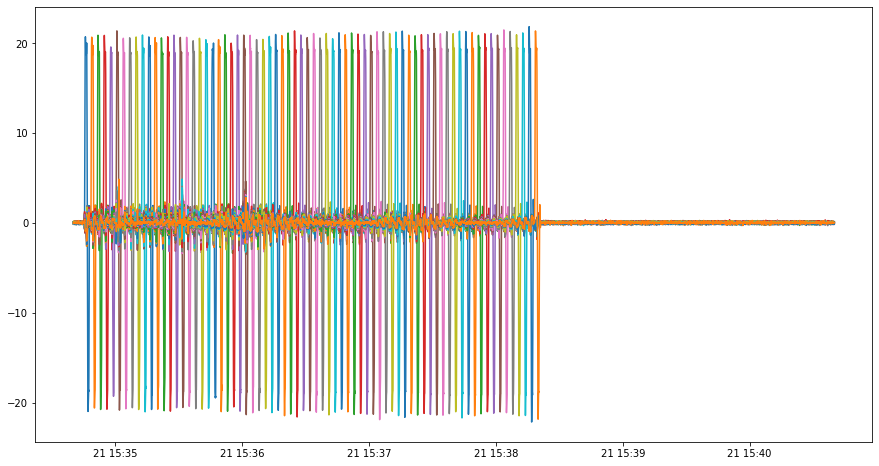

In [47]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(72):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), df['measured%d'%i]-df['measured%d'%i][0])

In [48]:
len(df)

7200

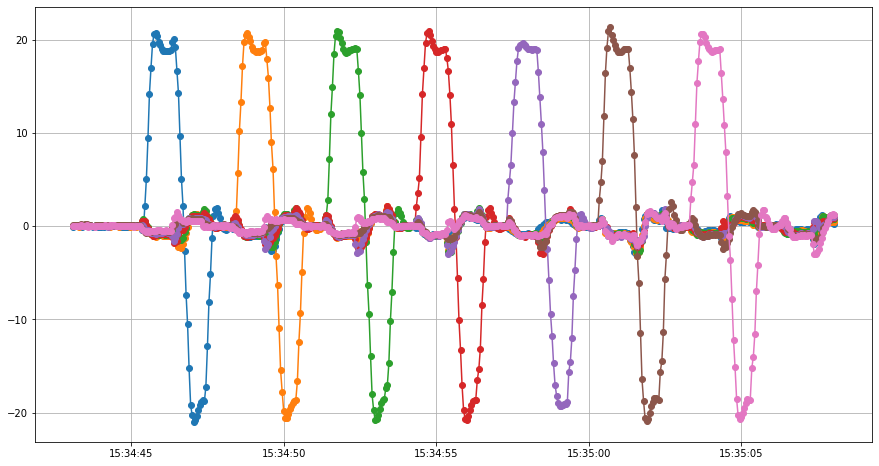

In [49]:
startIdx = np.argmax(np.array(df['measured0'] -df['measured0'][0])>10) - 50
fig, ax = plt.subplots(figsize=(15,8))
for i in range(7):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+500], unit='s'), 
             df['measured%d'%i][startIdx:startIdx+500]-df['measured%d'%i][0],'-o')
plt.grid()

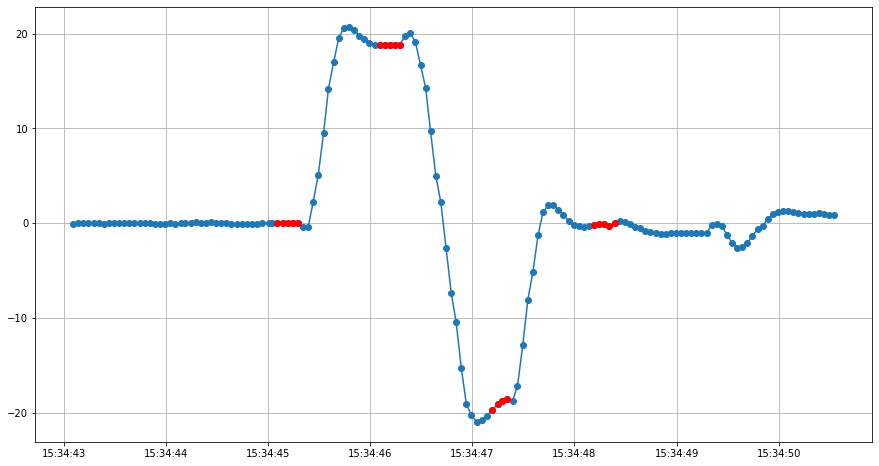

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+150], unit='s'), 
             df['measured%d'%i][startIdx:startIdx+150]-df['measured%d'%i][0],'-o')
plt.grid()
aa = np.array(df['measured%d'%i][startIdx:startIdx+150]-df['measured%d'%i][0])
i1 = np.argmax(aa>10)
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+10,i1+15)
idx2 = np.arange(i1+32, i1+36)
idx3 = np.arange(i1+52, i1+57)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+startIdx], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+startIdx], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+startIdx], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+startIdx], unit='s'), aa[idx3],'ro')

In [51]:
df = await client.select_time_series('lsst.sal.MTM2.tangentForce', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

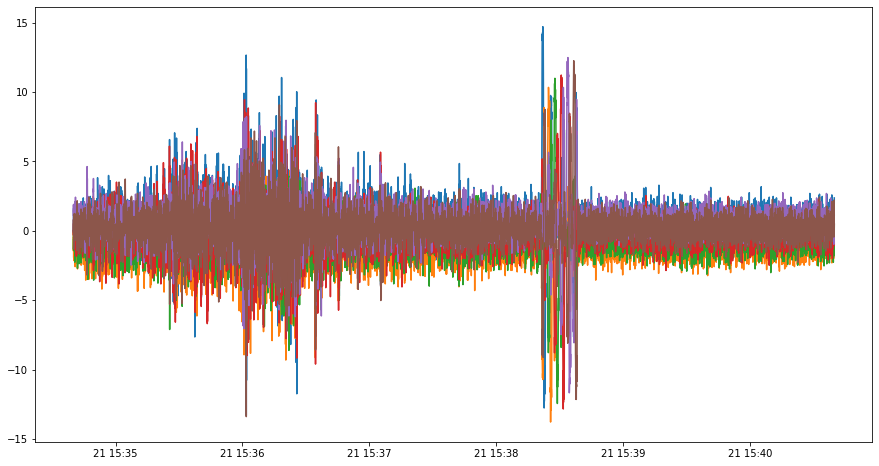

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
for i in range(6):
    plt.plot(df['measured%d'%i]-df['measured%d'%i][0])

In [53]:
i = 0
aa = np.array(df['measured%d'%(i)]-df['measured%d'%(i)][0])
nn = len(aa)
aa[:round(nn/2)] = 0
startIdx = np.argmax(aa>10) - 50

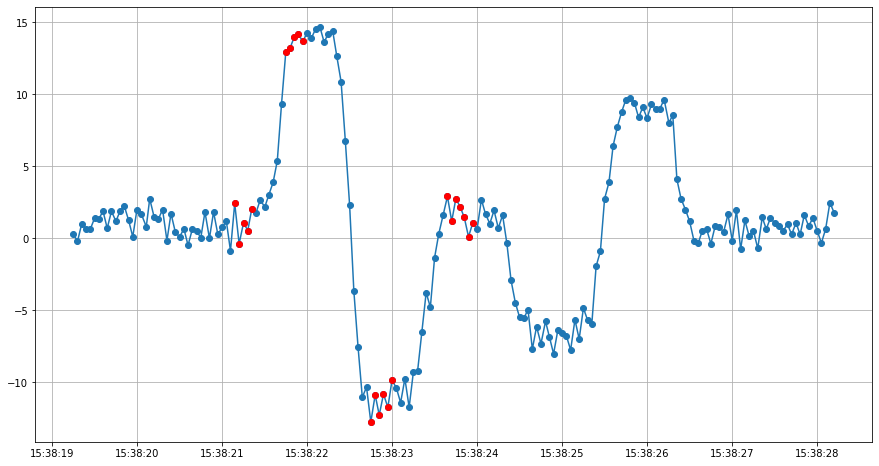

In [54]:
rr = 180
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(1):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             df['measured%d'%(i)][startIdx:startIdx+rr]-df['measured%d'%(i)][0],'-o')
plt.grid()
aa = np.array(df['measured%d'%(i)][startIdx:startIdx+rr]-df['measured%d'%(i)][0])
i1 = np.argmax(aa>0.95*max(aa))-4
idx0 = np.arange(i1-10,i1-5)
idx1 = np.arange(i1+2,i1+7)
idx2 = np.arange(i1+22, i1+28)
idx3 = np.arange(i1+40, i1+47)
plt.plot(pd.to_datetime(df.private_sndStamp[idx0+startIdx], unit='s'), aa[idx0],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx1+startIdx], unit='s'), aa[idx1],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx2+startIdx], unit='s'), aa[idx2],'ro')
plt.plot(pd.to_datetime(df.private_sndStamp[idx3+startIdx], unit='s'), aa[idx3],'ro');

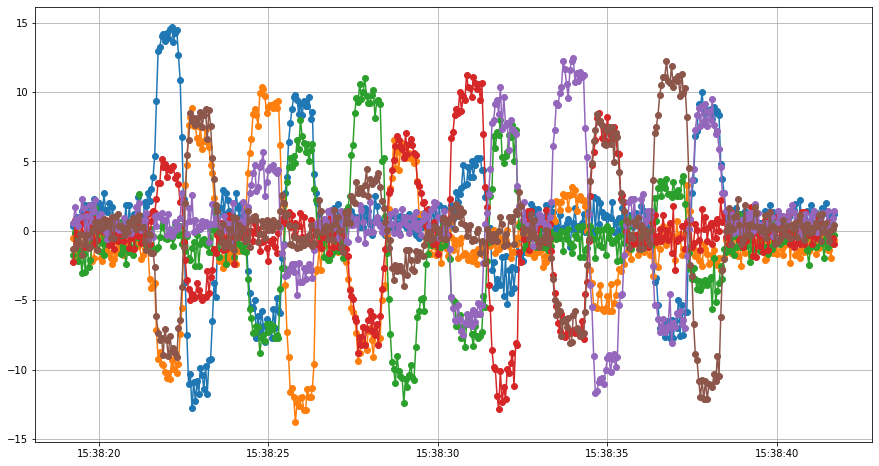

In [55]:
rr = 450
fig, ax = plt.subplots(figsize=(15,8))
for i in np.arange(6):
    plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+rr], unit='s'), 
             df['measured%d'%(i)][startIdx:startIdx+rr]-df['measured%d'%(i)][0],'-o')
plt.grid()
aa = np.array(df['measured%d'%(i)][startIdx:startIdx+rr]-df['measured%d'%(i)][0])